# Lag-Llama: Open-Source Foundation Model

link: https://medium.com/@odhitom09/lag-llama-an-open-source-base-model-for-predicting-time-series-data-2e897fddf005

- 단일 변수 예측
- 주기 무시하고 tokenizing, 어떤 주기든지 잘 적응한다.
- Transformer사용

# Token 생성

- Lag라는 이름에서도 알 수 있듯이, '지연된 특징들'(delayed features)를 생성한다.

- 데이터셋에서 quarterly, monthly, weekly, daily, hourly, second에 이르기까지, 모든 적절한 주기를 추출한다.

- 예) 일 별 데이터가 주어졌다면, 일별 lag (t-1), 주별 lag (t-7), 월별 lag(t-30)에 맞는 특성들을 모두 생성한다.

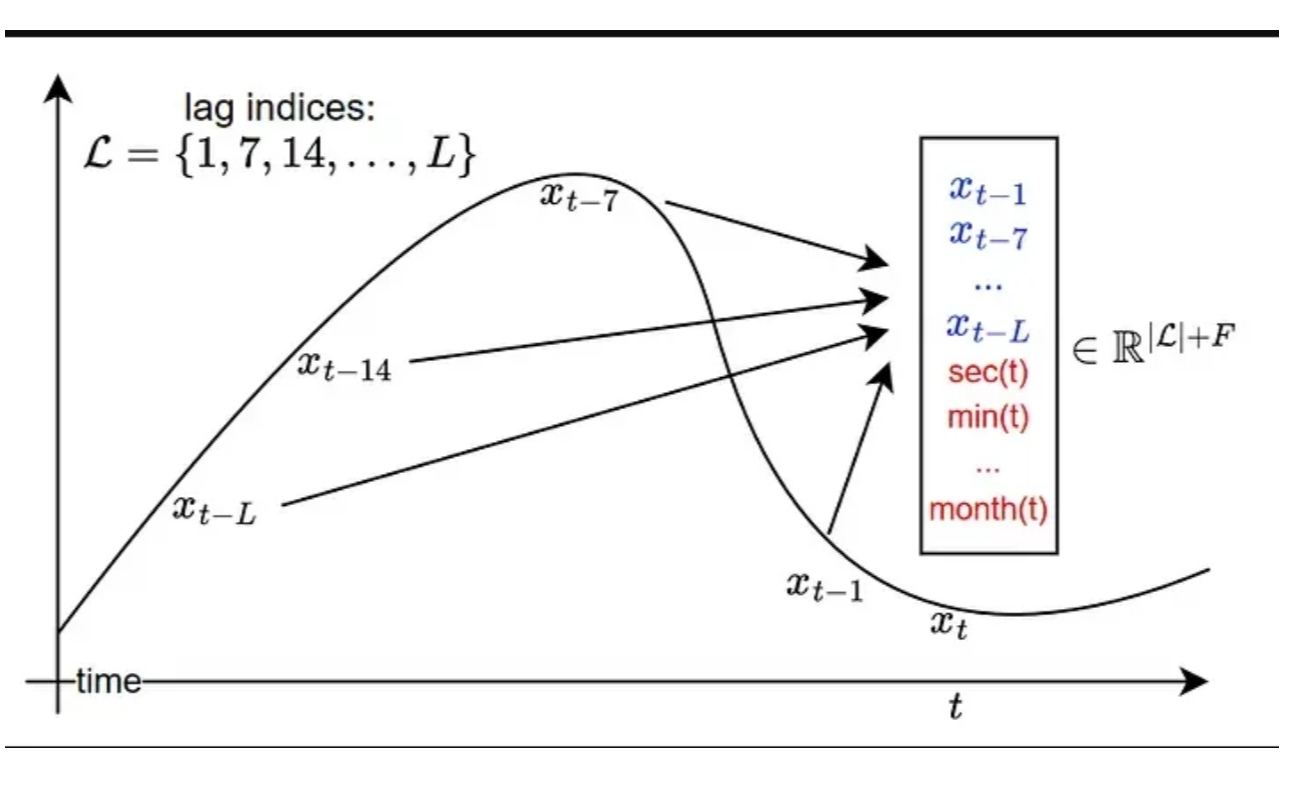

상단의 그림을 참고하면, 시간 주기의 원소 주기로서 고정된 보조변수(fixed covariates)들이 생성되는 것을 알 수 있다. ("fixed covariates are created such as second-of-minute, hour-of-day, so on")  

주기 내에서의 위치값을 저장한다고 할 수 있다.

모든 종류의 시계열에 적용가능한 방법론이지만, 상단의 고정된 lag indices로 인해 아주 큰 input tokens를 생성한다는 단점이 있다.

일례로, 시간 별 데이터에 대한 월별 주기를 분석하는 것은 730 time step을 요구한다. 그러므로 input token이 fixed covariates를 제외하고도 최소 730개가 된다.

# Lag-Llama 구조

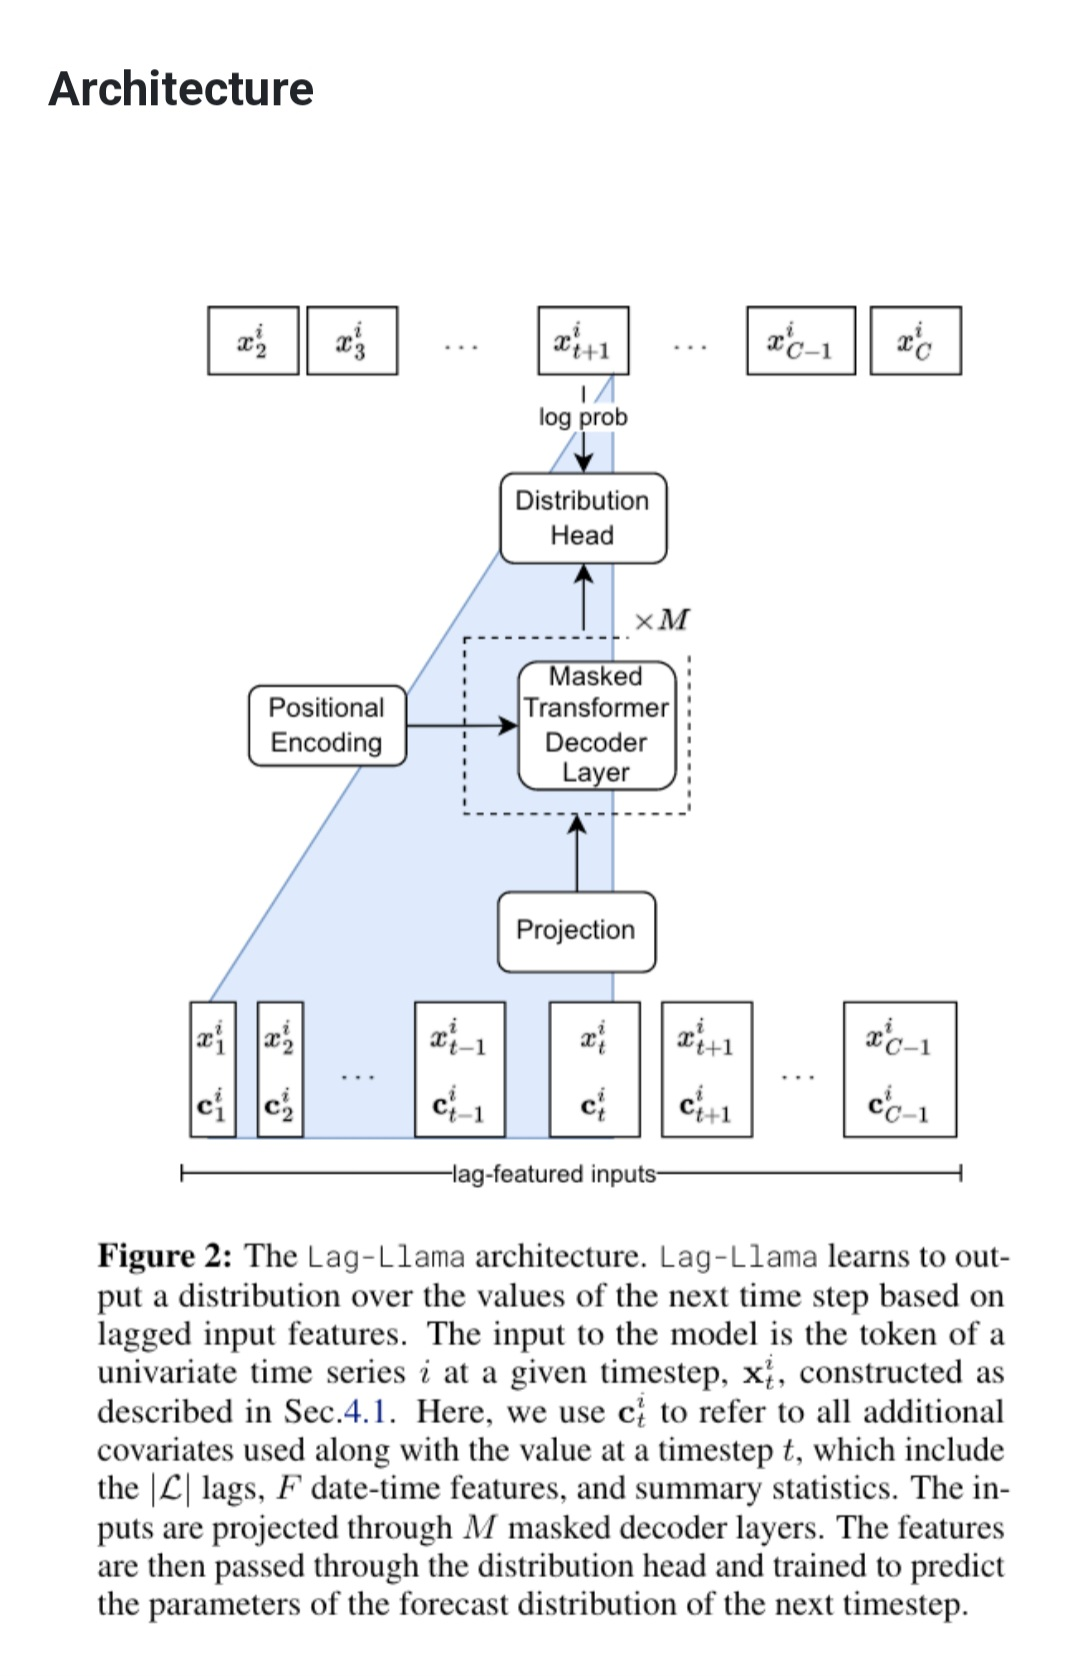

- $x$ 변수들이 input tokens, $c$ 가 보조변수들이다.
- $x_t$를 기준으로 과거 데이터들, 지연된 시간 단계들(delayed time step)를 활용하는 것을 알 수 있다.
- $c$는 해당 변수가 주기에 따라 갖는 위치값을 나타낸다 (static covariates).


- input sequence는 이후 decoder에 존재하는 은밀층으로 전사(projection)된다.

- Masked 된 부분을 통해 데이터 간 관계를 학습하게된다

- distribution head를 통해 log-prob 적 분포를 생성하게 된다

- 이후에 autoregressive decoding을 통해 horizon length까지 예측을 생성한다.

- 자기회귀적 프로세스는(autoregressive process) 일종의 구간을 생성하게 해준다.

# Distribution Head

- 일종의 확률 분포를 생성해준다
- 예측 인터벌들을 생성해준다
- 이 모델에서는 마지막 layer가 student's t-distribution을 사용해서 interval들을 합친다
- 이 distribution head는 다른 종류의 layer들로도 대체가능하다

# Foundational Model

- 352 백만개 토큰에 달하는 시계열 데이터에 대해 학습되어있다.
- zero-shot의 원리는 미리 수많은 데이터를 학습하여서 비슷한 유형의 데이터에 대해서는 별도의 train 없이 추측을 하는 느낌이다.
- 그래서 foundation model들은 기존에 학습되지 않은 새로운 유형의 데이터일 경우 추론능력이 떨어진다고 알려져있다.
- 금융 데이터의 노이즈가 심하거나 매번 경우가 다르다고 할 경우, foundation model의 성능이 떨어질 수도 있다.

# 모델 테스트

- Australian Electricity Demand

- 하단처럼 github를 복사해와서 모델 실행 가능하다!!

## get repo

In [ ]:
!git clone https://github.com/time-series-foundation-models/lag-llama/

Cloning into 'lag-llama'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (166/166), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 328 (delta 114), reused 108 (delta 85), pack-reused 162
Receiving objects: 100% (328/328), 234.56 KiB | 9.77 MiB/s, done.
Resolving deltas: 100% (155/155), done.


In [ ]:
cd lag-llama

/content/lag-llama


In [ ]:
pip install -r /content/lag-llama/requirements.txt --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.1/778.1 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 43.4 MB/s eta 0:00:00


In [ ]:
!huggingface-cli download time-series-foundation-models/Lag-Llama lag-llama.ckpt --local-dir /content/lag-llama

lag-llama.ckpt: 100% 29.5M/29.5M [00:00<00:00, 82.2MB/s]
Download complete. Moving file to /content/lag-llama/lag-llama.ckpt
/content/lag-llama/lag-llama.ckpt


## get dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import torch

from itertools import islice

from gluonts.evaluation import make_evaluation_predictions, Evaluator
from gluonts.dataset.repository.datasets import get_dataset
from lag_llama.gluon.estimator import LagLlamaEstimator

/usr/local/lib/python3.10/dist-packages/gluonts/json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [ ]:
dataset = get_dataset("australian_electricity_demand")
backtest_dataset = dataset.test
prediction_length = dataset.metadata.prediction_length
context_length = 3 * prediction_length

Download australian_electricity_demand_dataset.zip:: 5.51MB [00:02, 2.55MB/s]
creating json files: 100%|██████████| 5/5 [00:00<00:00, 7799.00it/s]


## Initialize model

In [ ]:
ckpt = torch.load("lag-llama.ckpt", map_location=torch.device('cuda:0'))
estimator_args =ckpt["hyper_parameters"]["model_kwargs"]

In [ ]:
estimator = LagLlamaEstimator(ckpt_path = "lag-llama.ckpt",
    prediction_length = prediction_length,
    context_length = context_length,
    input_size = estimator_args["input_size"],
    n_layer=estimator_args["n_layer"],
    n_embd_per_head=estimator_args["n_embd_per_head"],
    n_head=estimator_args["n_head"],
    scaling = estimator_args["scaling"],
    time_feat=estimator_args["time_feat"])

lightning_module = estimator.create_lightning_module()
transformation = estimator.create_transformation()
predictor = estimator.create_predictor(transformation, lightning_module)

## generate predictions

In [ ]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=backtest_dataset,
    predictor=predictor)

In [ ]:
forecasts = list(forecast_it)
tss = list(ts_it)

## Evaluation

- gluonts 를 이용해서 간편하게 측정

In [ ]:
evaluator = Evaluator()

agg_metrics, ts_metrics = evaluator(iter(tss), iter(forecasts))

Running evaluation: 5it [00:00, 171.15it/s]


In [ ]:
import numpy as np

np.sqrt(agg_metrics['MSE'])

493.01718970940385

# 결과 시각화

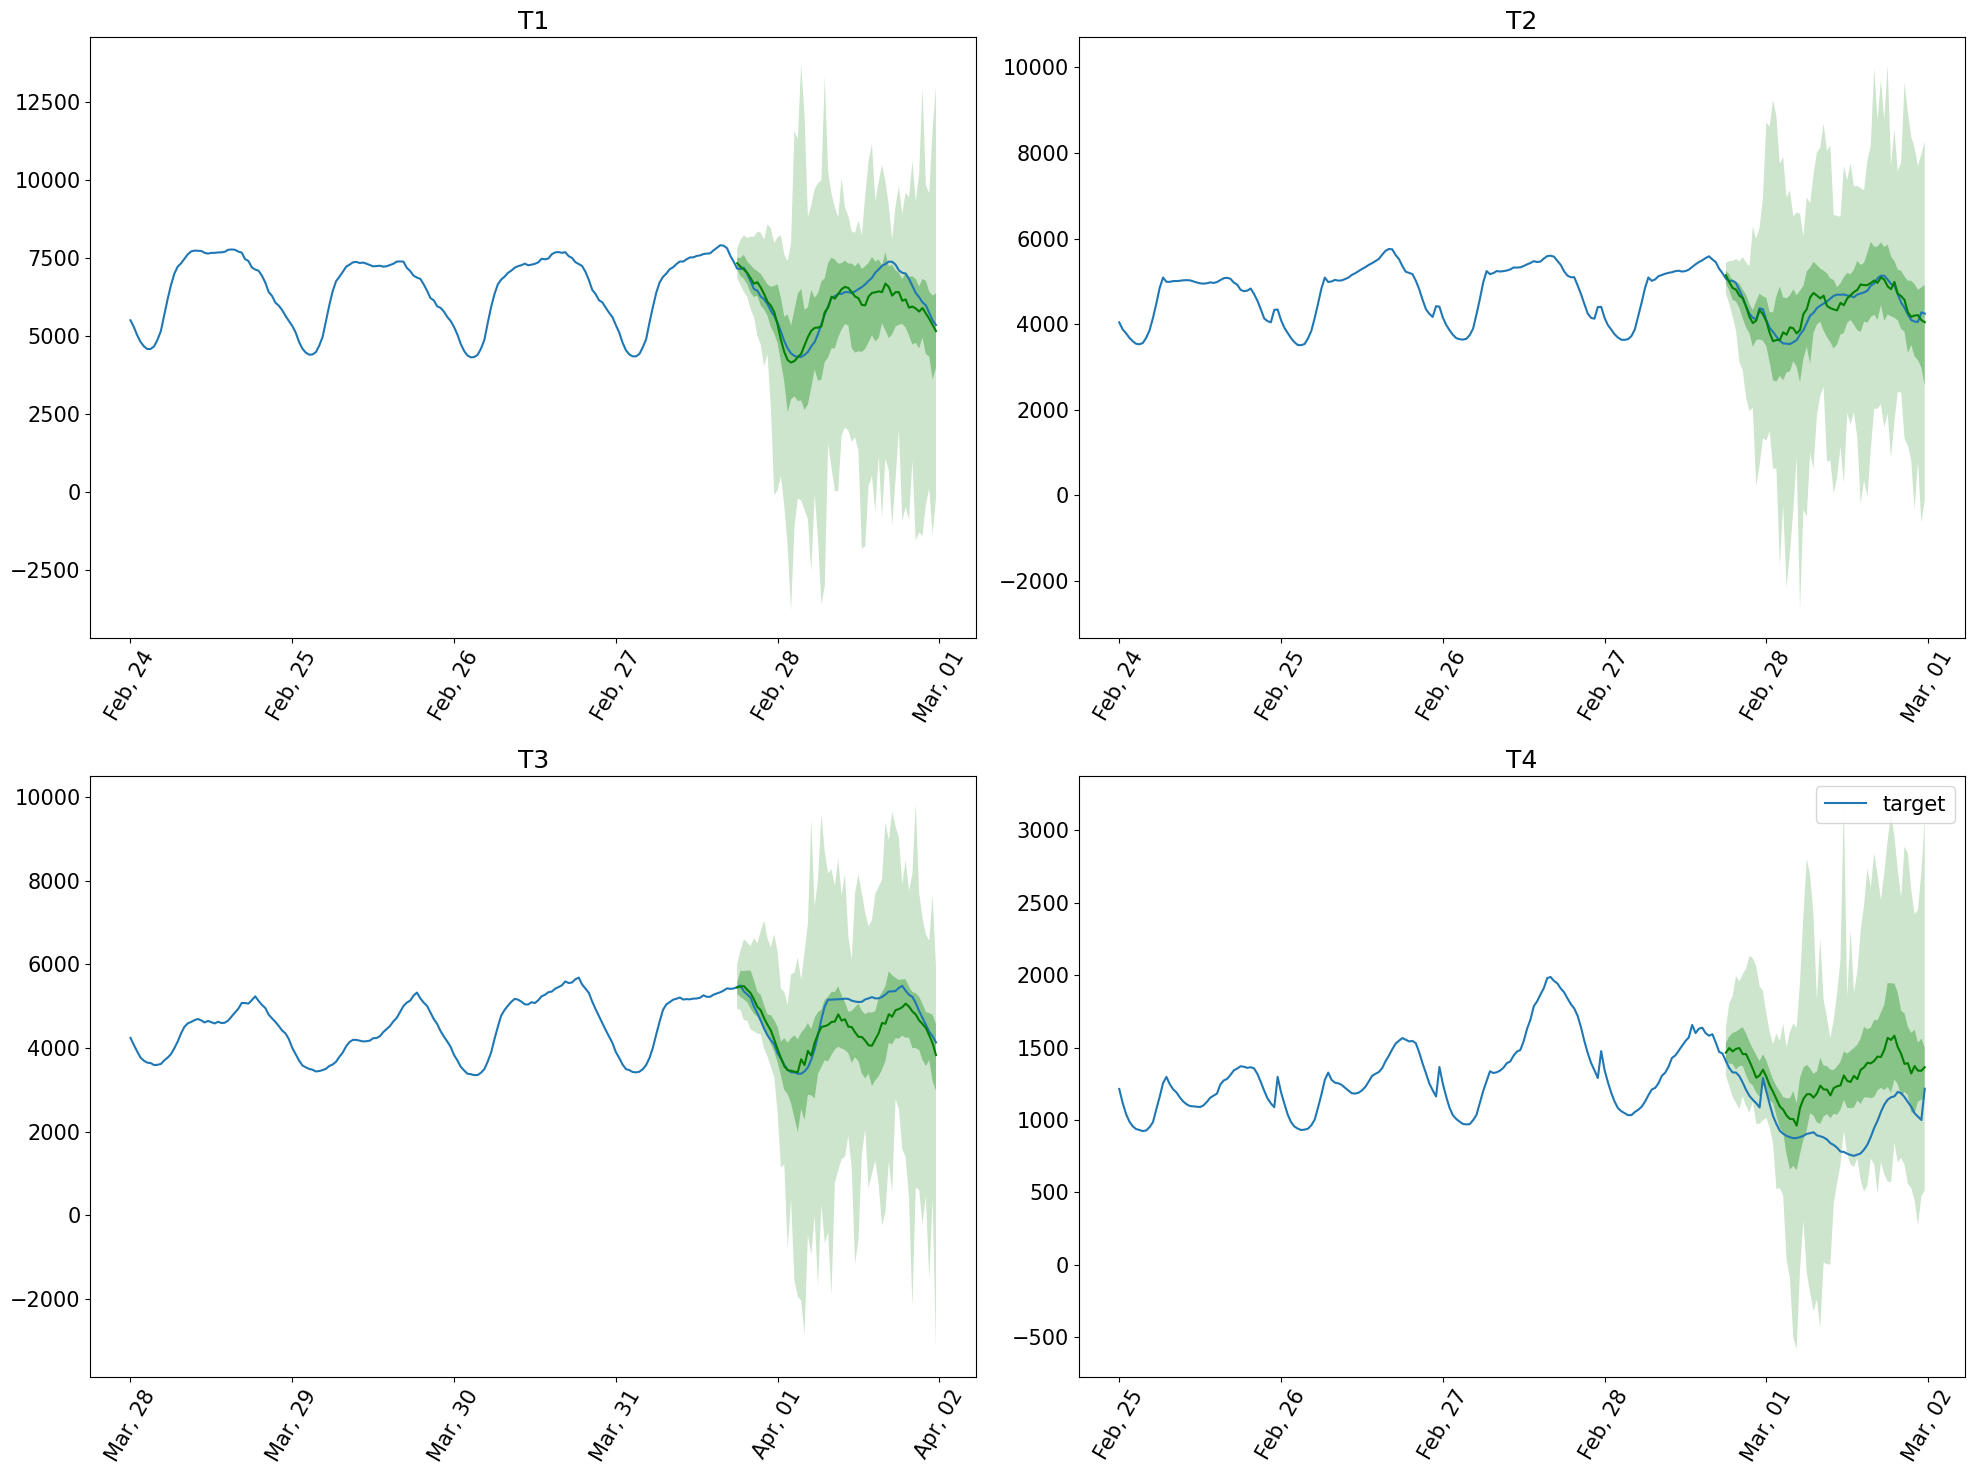

In [ ]:
plt.figure(figsize=(20,15))
date_formater =mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 4):
    ax = plt.subplot(2,2, idx+1)
    plt.plot(ts[-4 * dataset.metadata.prediction_length:].to_timestamp(), label="target")
    forecast.plot(color='g')

    plt.xticks(rotation=60)
    ax.xaxis.set_major_formatter(date_formater)
    ax.set_title(forecast.item_id)

plt.gcf().tight_layout()
plt.legend()
plt.show()

# 분석

4 번째 데이터를 보면 좀 벗어난다

# Comparison with TFT and DeepAR
- GluonTS and TFT and DeepAR

In [ ]:
from gluonts.torch import TemporalFusionTransformerEstimator, DeepAREstimator

tft_estimator = TemporalFusionTransformerEstimator(
    prediction_length=prediction_length,
    context_length=context_length,
    freq="30min",
    trainer_kwargs={"max_epochs": 5}
)

deepar_estimator = DeepAREstimator(
    prediction_length=prediction_length,
    context_length=context_length,
    freq="30min",
    trainer_kwargs={"max_epochs": 5}
)

In [ ]:
tft_predictor = tft_estimator.train(dataset.train)
deepar_predictor = deepar_estimator.train(dataset.train)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name  | Type                           | Params | In sizes                                                                                 | Out sizes 
----------------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 50: 'train_loss' reached 3240.58691 (best 3240.58691), saving model to '/content/lag-llama/lightning_logs/version_0/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 50: 'train_loss' reached 3240.58691 (best 3240.58691), saving model to '/content/lag-llama/lightning_logs/version_0/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO: Epoch 1, global step 100: 'train_loss' reached 2219.11084 (best 2219.11084), saving model to '/content/lag-llama/lightning_logs/version_0/checkpoints/epoch=1-step=100.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 100: 'train_loss' reached 2219.11084 (best 2219.11084), saving model to '/content/lag-llama/lightning_logs/version_0/checkpoints/epoch=1-step=100.ckpt' as top 1


In [ ]:
# 예측 수행

tft_forecast_it, tft_ts_it = make_evaluation_predictions(
    dataset=backtest_dataset,
    predictor=tft_predictor
)

deepar_forecast_it, deepar_ts_it = make_evaluation_predictions(
    dataset=backtest_dataset,
    predictor=deepar_predictor
)

tft_forecasts = list(tft_forecast_it)
tft_tss = list(tft_ts_it)

deepar_forecasts = list(deepar_forecast_it)
deepar_tss = list(deep_ts_it)

#evaluation
tft_agg_metrics, tft_ts_metrics = evaluator(iter(tft_tss), iter(tft_forecasts))
deepar_agg_metrics, deepar_ts_metrics = evaluator(iter(deepar_tss), iter(deepar_forecasts))